In [2]:
import torch
import cv2
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

from torchsummary import summary

In [3]:
num_epochs = 100
batch_size = 512
image_height = 100
image_width = 100
num_channels = 3

transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                       transforms.Resize((image_height, image_width)),
                                       ])

# train_set = datasets.ImageFolder(
#     root='../archive/fruits-360-original-size/fruits-360-original-size/Training',
#     transform=transform
# )

# validation_set = datasets.ImageFolder(
#     root='../archive/fruits-360-original-size/fruits-360-original-size/Validation',
#     transform=transform
# )

# test_set = datasets.ImageFolder(
#     root='../archive/fruits-360-original-size/fruits-360-original-size/Test',
#     transform=transform
# )

## Check

train_set = datasets.ImageFolder(
    root='../archive/fruits-360_dataset/fruits-360/Training',
    transform=transform
)

test_set = datasets.ImageFolder(
    root='../archive/fruits-360_dataset/fruits-360/Test',
    transform=transform
)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

#validationloader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size, shuffle=False)

In [4]:
train_set

Dataset ImageFolder
    Number of datapoints: 67692
    Root location: ../archive/fruits-360_dataset/fruits-360/Training
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [6]:
test_set

Dataset ImageFolder
    Number of datapoints: 22688
    Root location: ../archive/fruits-360_dataset/fruits-360/Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=warn)
           )

In [7]:
classes = train_set.classes
print(classes)
print('Class size:', len(classes))

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [8]:
test_classes = test_set.classes
print(test_classes)
print('Class size:', len(test_classes))

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [9]:
num_classes = len(train_set.classes)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print('Device:', device)

Device: cuda


In [11]:
class Fruits_CNN(nn.Module):
    def __init__(self):
        super(Fruits_CNN, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=num_channels, out_channels=16, kernel_size=5, stride=1, padding='same'),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=4, stride=1, padding='same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding='same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5, stride=5)
        )

        self.linear_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=1600, out_features=512),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        out = self.conv_layers(x)
        out = self.linear_layers(out)
        return out

In [12]:
class EarlyStopping():
    def __init__(self, patience=5, min_delta=0,save_best=False):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.save_best=save_best
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
            if self.save_best:
                self.save_best_model()
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            if self.save_best:
                self.save_best_model()
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
    
    def save_best_model(self):
        print(">>> Saving the current model with the best loss value...")
        print("-"*100)
        torch.save(model.state_dict(), './parameters/best_model_loss.pkl')

In [13]:
model = Fruits_CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#lr_scheduler = LRScheduler(optimizer= optimizer,patience=5,min_lr=1e-7, factor=0.5)
early_stopping = EarlyStopping(patience=15, min_delta=0, save_best=True)

print(summary(model, (num_channels, image_height,image_width),batch_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [512, 16, 100, 100]           1,216
       BatchNorm2d-2        [512, 16, 100, 100]              32
              ReLU-3        [512, 16, 100, 100]               0
         MaxPool2d-4          [512, 16, 50, 50]               0
            Conv2d-5          [512, 32, 50, 50]           8,224
       BatchNorm2d-6          [512, 32, 50, 50]              64
              ReLU-7          [512, 32, 50, 50]               0
         MaxPool2d-8          [512, 32, 25, 25]               0
            Conv2d-9          [512, 64, 25, 25]          18,496
      BatchNorm2d-10          [512, 64, 25, 25]             128
             ReLU-11          [512, 64, 25, 25]               0
        MaxPool2d-12            [512, 64, 5, 5]               0
          Flatten-13                [512, 1600]               0
           Linear-14                 [5

C:\Users\hejac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:1004.)
  return F.conv2d(input, weight, bias, self.stride,


In [17]:
from datetime import datetime
import math

In [18]:
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

In [20]:
print('***** Start Training *****')

for epoch in range(num_epochs):

    start_time = datetime.now()

    correct = 0
    iterations = 0
    training_loss = 0.0

    for i, data in enumerate(trainloader):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        training_loss += loss.item()
        # zero the parameter gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _,pred = torch.max(outputs, dim=1)
        correct += (pred == labels).sum().item()
        iterations += 1

    train_accuracy.append(100 * correct / len(train_set))
    train_loss.append(training_loss / iterations)

    # Testing part
    testing_loss = 0.0
    correct = 0
    iterations = 0

    model.eval()
    for i, data in enumerate(testloader):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        testing_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

        iterations += 1
    
    test_accuracy.append(100 * correct / len(test_set))
    test_loss.append(testing_loss / iterations)

    print('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Acc: {:.3f}'.format(epoch + 1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1]))

    end_time = datetime.now()
    epoch_time = (end_time - start_time).total_seconds()
    print("-"*100)
    print('Epoch Time : ', math.floor(epoch_time // 60), ':', math.floor(epoch_time % 60))
    print("-"*100)
    
    early_stopping(test_loss[-1])
    if early_stopping.early_stop:
        print('*** Early stopping ***')
        break

print('***** Finished Training *****')

***** Start Training *****
Epoch 1/100, Training Loss: 0.930, Training Accuracy: 77.535, Testing Loss: 0.144, Testing Acc: 95.985
----------------------------------------------------------------------------------------------------
Epoch Time :  13 : 21
----------------------------------------------------------------------------------------------------
>>> Saving the current model with the best loss value...
----------------------------------------------------------------------------------------------------
Epoch 2/100, Training Loss: 0.014, Training Accuracy: 99.678, Testing Loss: 0.086, Testing Acc: 98.171
----------------------------------------------------------------------------------------------------
Epoch Time :  1 : 38
----------------------------------------------------------------------------------------------------
>>> Saving the current model with the best loss value...
----------------------------------------------------------------------------------------------------
Epoc

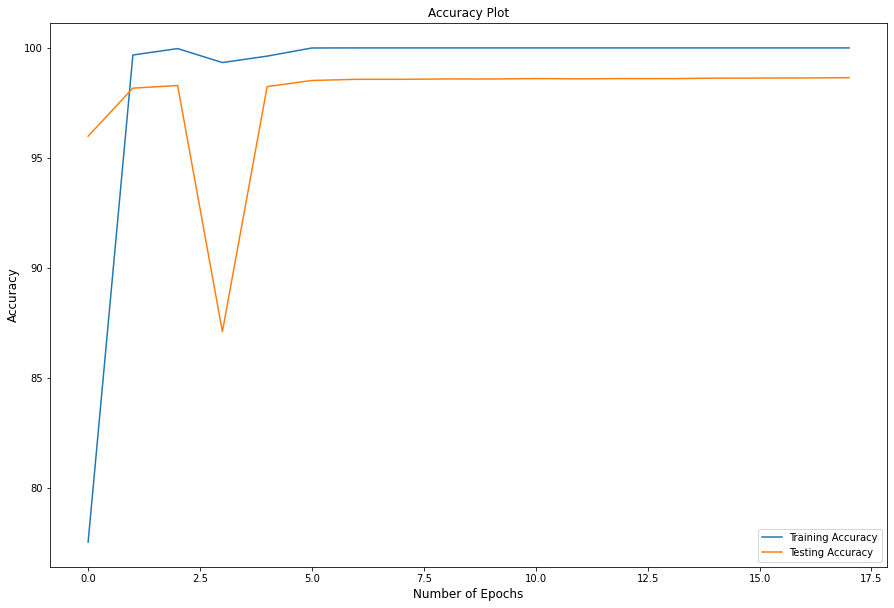

In [21]:
fig = plt.figure(figsize=(15,10))
plt.title("Accuracy Plot")
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')

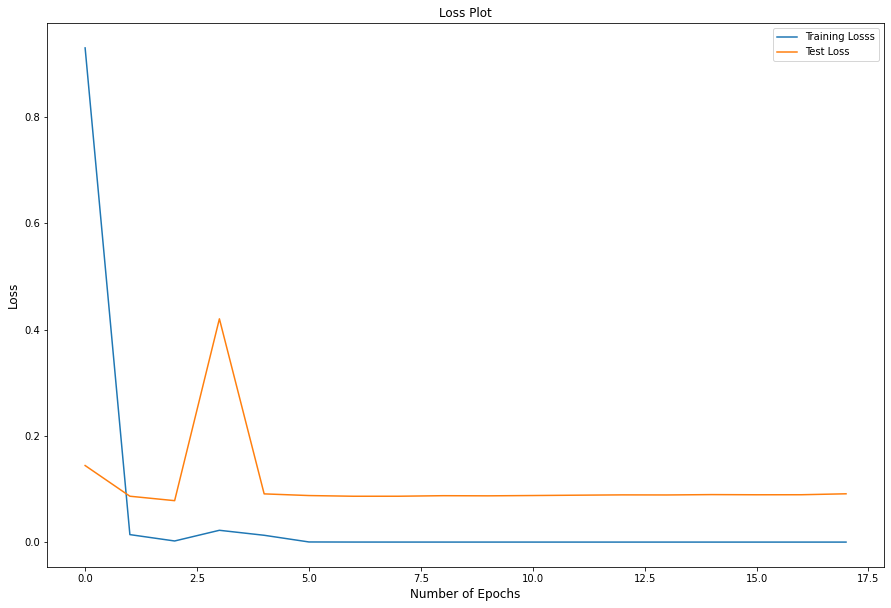

In [22]:
fig = plt.figure(figsize=(15,10))
plt.title("Loss Plot")
plt.plot(train_loss, label='Training Losss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='best')

In [14]:
model = Fruits_CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.load_state_dict(torch.load('./parameters/best_model_loss.pkl'))
model.eval()

Fruits_CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1), padding=same)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1600, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout

In [15]:
def what_fruit_is_this(img,temp):
    #img = cv2.imread(fruit_path)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = torch.autograd.Variable(transform(img)).unsqueeze(0)
    output = model(x)
    max_prob ,prediction_idx = torch.max(output, 1)
    max_p = max_prob.detach().numpy()
    prediction = test_set.classes[prediction_idx]
    if max_prob>1:
        return max_p,prediction
    else:
        return -1,-1

In [16]:
def is_similar(pos1, pos2, threshold=0.6):
    """Check if the position of two elements is too similar."""
    overlap = 0
    for i in range(3):
        start1 = pos1[i]
        end1 = pos1[i] + pos1[i+1]
        start2 = pos2[i]
        end2 = pos2[i] + pos2[i+1]
        overlap += max(0, min(end1, end2) - max(start1, start2))
    area1 = pos1[1] * pos1[2]
    area2 = pos2[1] * pos2[2]
    overlap_area = overlap * pos1[2]
    return overlap_area / min(area1, area2) > threshold

In [53]:
def predict_test(img:np.ndarray,temp):
    """use boosting to recognize imgs"""
    h,w,_ = img.shape
    fruit = {} #fruit->[count,[[i,j,kernel size]],prob]
    for i in range(5):
        kernel_size = (i+1) * (h //5)
        stride = kernel_size 
        for j in range(0, h-kernel_size+1, stride):
            for k in range(0, w-kernel_size+1, stride):
                kernel = img[j:j+kernel_size, k:k+kernel_size, :]
                #print(kernel.shape)
                max_p,result = what_fruit_is_this(kernel,temp)
                if result!=-1:
                    if result not in fruit:
                        fruit[result] =[1,[[j,k,kernel_size]],[max_p[0]]]

                    else:
                        fruit[result][0]+=1
                        fruit[result][1].append([j,k,kernel_size])
                        fruit[result][2].append(max_p[0])

    ct = 0 #count
    sorted_list =[] #[fruit,[j,k,kernel size],prob]
    for key, (count, positions, probs) in fruit.items():
        for i in range(count):
            sorted_list.append([key, positions[i], probs[i]])

    for item in sorted_list:
        if item[1][2]>100:
            item[2] *= 100/item[1][2]
        else:
            item[2] *= item[1][2]/100
    sorted_list = sorted(sorted_list, key=lambda x: x[2], reverse=True)
    outputs ={}
    location = [] #list of locations of the object
    for i in sorted_list:
        if i[2]>temp:
            location.append([i[1],i[0]])
            if i[0] not in outputs:
                outputs[i[0]]=1
            else:
                outputs[i[0]]+=1
    return outputs,location

Count number of fruits

In [18]:
apple_brae = cv2.imread('./sample_images/apple_braeburn.jpg')
apple_brae = cv2.cvtColor(apple_brae, cv2.COLOR_BGR2RGB)

apple_crim = cv2.imread('./sample_images/apple_crimson_snow.jpg')
apple_crim = cv2.cvtColor(apple_crim, cv2.COLOR_BGR2RGB)

apricot = cv2.imread('./sample_images/apricot.jpg')
apricot = cv2.cvtColor(apricot, cv2.COLOR_BGR2RGB)

avocado = cv2.imread('./sample_images/avocado.jpg')
avocado = cv2.cvtColor(avocado, cv2.COLOR_BGR2RGB)

banana = cv2.imread('./sample_images/banana.jpg')
banana = cv2.cvtColor(banana, cv2.COLOR_BGR2RGB)

blueberry = cv2.imread('./sample_images/blueberry.jpg')
blueberry = cv2.cvtColor(blueberry, cv2.COLOR_BGR2RGB)

carambula = cv2.imread('./sample_images/carambula.jpg')
carambula = cv2.cvtColor(carambula, cv2.COLOR_BGR2RGB)

cauliflower = cv2.imread('./sample_images/cauliflower.jpg')
cauliflower = cv2.cvtColor(cauliflower, cv2.COLOR_BGR2RGB)

corn = cv2.imread('./sample_images/corn.jpg')
corn = cv2.cvtColor(corn, cv2.COLOR_BGR2RGB)

eggplant = cv2.imread('./sample_images/eggplant.jpg')
eggplant = cv2.cvtColor(eggplant, cv2.COLOR_BGR2RGB)

ginger = cv2.imread('./sample_images/ginger_root.jpg')
ginger = cv2.cvtColor(ginger, cv2.COLOR_BGR2RGB)

grape = cv2.imread('./sample_images/grape_white.jpg')
grape = cv2.cvtColor(grape, cv2.COLOR_BGR2RGB)

pear = cv2.imread('./sample_images/pear.jpg')
pear = cv2.cvtColor(pear, cv2.COLOR_BGR2RGB)

pepper = cv2.imread('./sample_images/pepper_green.jpg')
pepper = cv2.cvtColor(pepper, cv2.COLOR_BGR2RGB)

pomegranate = cv2.imread('./sample_images/pomegranate.jpg')
pomegranate = cv2.cvtColor(pomegranate, cv2.COLOR_BGR2RGB)

potato = cv2.imread('./sample_images/potato.jpg')
potato = cv2.cvtColor(potato, cv2.COLOR_BGR2RGB)

rambutan = cv2.imread('./sample_images/rambutan.jpg')
rambutan = cv2.cvtColor(rambutan, cv2.COLOR_BGR2RGB)

strawberry = cv2.imread('./sample_images/strawberry.jpg')
strawberry = cv2.cvtColor(strawberry, cv2.COLOR_BGR2RGB)

tomato_cheery = cv2.imread('./sample_images/tomato_cheery.jpg')
tomato_cheery = cv2.cvtColor(tomato_cheery, cv2.COLOR_BGR2RGB)

watermelon = cv2.imread('./sample_images/watermelon.jpg')
watermelon = cv2.cvtColor(watermelon, cv2.COLOR_BGR2RGB)

[[[0, 100, 100], 'Watermelon'], [[0, 300, 100], 'Pepper Green'], [[0, 400, 100], 'Pear'], [[0, 0, 100], 'Apple Braeburn'], [[0, 200, 100], 'Blueberry'], [[0, 320, 80], 'Pepper Green'], [[0, 500, 100], 'Potato Sweet']]


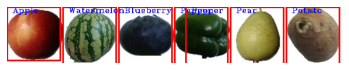

In [70]:
images = np.hstack((apple_brae, watermelon, blueberry, pepper, pear, potato))
result,location = predict_test(images,20)
print(location)
for i in (location):
    start = (i[0][1],i[0][0])
    end = (i[0][1]+i[0][2]-5,i[0][1]+i[0][2]-5)
    imges = cv2.rectangle(images,pt1 = start,pt2=end,color=(255,0,0),thickness=2)
    cv2.putText(images,text=i[1].split(' ')[0],org=(start[0]+10,start[1]+10),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=0.7,color=(0,0,255),thickness=1)
plt.axis('off')
plt.imshow(images)

Computer Vision Part

In [72]:
def predict(img:np.ndarray,temp):
    """use boosting to recognize imgs"""
    h,w,_ = img.shape
    fruit = {} #fruit->[count,[[i,j,kernel size]],prob]
    for i in range(5):
        kernel_size = (i+1) * (h //5)
        stride = kernel_size 
        for j in range(0, h-kernel_size+1, stride):
            for k in range(0, w-kernel_size+1, stride):
                kernel = img[j:j+kernel_size, k:k+kernel_size, :]
                #print(kernel.shape)
                max_p,result = what_fruit_is_this(kernel,temp)
                if result!=-1:
                    if result not in fruit:
                        fruit[result] =[1,[[j,k,kernel_size]],[max_p[0]]]

                    else:
                        fruit[result][0]+=1
                        fruit[result][1].append([j,k,kernel_size])
                        fruit[result][2].append(max_p[0])


    sorted_list =[] #[fruit,[j,k,kernel size],prob]
    for key, (count, positions, probs) in fruit.items():
        for i in range(count):
            sorted_list.append([key, positions[i], probs[i]])

    for item in sorted_list:
        if item[1][2]>100:
            item[2] *= 100/item[1][2]
        else:
            item[2] *= item[1][2]/100
    sorted_list = sorted(sorted_list, key=lambda x: x[2], reverse=True)
    # extract the top 5 fruits from the sorted list
    print(len(sorted_list))
    top_fruits = [fruit for fruit in sorted_list[:10]]
    return top_fruits

Image size on 100 by 100

100
[['Physalis with Husk', [0, 0, 100], 21.768503189086914], ['Physalis with Husk', [0, 0, 80], 19.95997772216797], ['Melon Piel de Sapo', [0, 100, 100], 18.25806999206543], ['Grape White', [0, 80, 80], 13.796710205078126], ['Cantaloupe 2', [0, 200, 100], 11.063826560974121], ['Physalis with Husk', [0, 0, 60], 11.03905563354492], ['Grape White', [0, 120, 60], 8.918428230285643], ['Cantaloupe 1', [40, 40, 40], 8.906954956054689], ['Cantaloupe 2', [0, 60, 60], 8.244438743591308], ['Banana', [0, 160, 80], 8.1179931640625]]


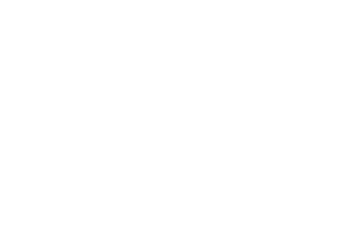

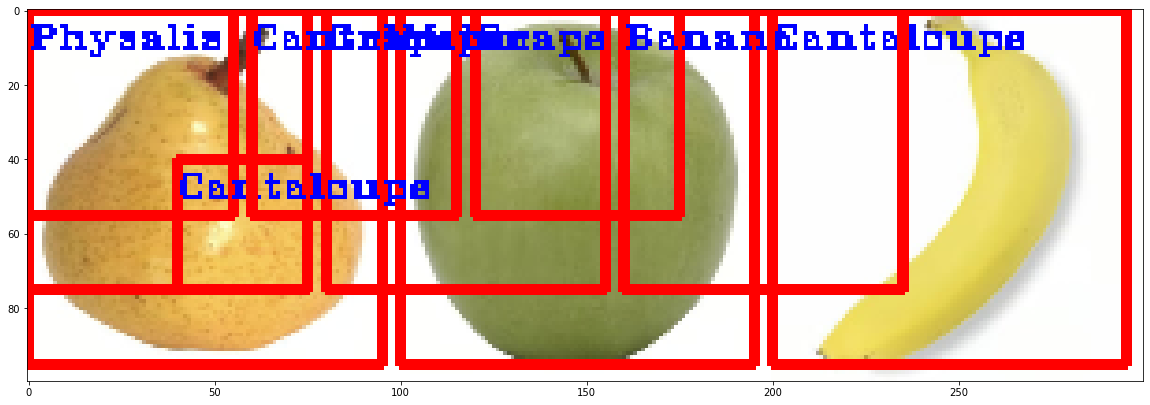

In [82]:
img1 = cv2.imread('./online_sources/pear.jpg')
img2 = cv2.imread('./online_sources/apple.jpg')
img3 = cv2.imread('./online_sources/banana.jpg')
img1 = cv2.resize(img1, (100, 100))
img2 = cv2.resize(img2, (100, 100))
img3 = cv2.resize(img3, (100, 100))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
images_100 = np.hstack((img1, img2, img3))
result = predict(images_100,20) #[name, location, prob]
print(result)
for name,location,_ in (result):
    start = (location[1],location[0])
    end = (location[1]+location[2]-5,location[0]+location[2]-5)
    images_100 = cv2.rectangle(images_100,pt1 = start,pt2=end,color=(255,0,0),thickness=2)
    cv2.putText(images_100,text=name.split(' ')[0],org=(start[0],start[1]+10),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=0.5,color=(0,0,255),thickness=1)

plt.axis('off')

plt.figure(figsize=(20,20))
plt.imshow(images_100)

Referennce:
1. Fruits-360 on Kaggle: https://www.kaggle.com/datasets/moltean/fruits
2. Convolution Neural Netowork structure: https://www.kaggle.com/code/darkwyvern/fruits360-pytorch-cnn/notebook
3. PyTorch Training a classifier: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
4. Define a Neural Network in PyTorch: https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html